In [25]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import random
%matplotlib inline

In [26]:
f = 900e6
t = np.arange(0,200,dtype=float128)/(100*f)
carrier_wave = cos(2*pi*f*t)
wave_length = 3e8/f

In [27]:
#Since carrier wave oscillates at f 1/sec
#signal recieved should be time dependent
#Propagation speed of c
#Time difference is distance is c/d seconds
class ULA:
    prop_speed = 3e8
    def __init__(self,distance,coord,angle,num_elements):
        self.distance = distance
        self.coord = coord
        self.angle = angle/360*2*pi
        self.num_elements = num_elements
        self.positions = []
        self.phase = []
        self.update_positions()
    def update_phase(self,transmitter):
        self.phase = []
        d_h = [transmitter.distance_traveled([self.positions[0][n],self.positions[1][n]]) 
               for n in arange(0,self.num_elements)]
        for element in d_h:
            self.phase.append(360*(((element/ULA.prop_speed*transmitter.frequency)
                              -int(element/ULA.prop_speed*transmitter.frequency))))
    def update_positions(self):
        temp_pos = array([i*self.distance 
                          for i in arange(0,self.num_elements)])-0.5*(self.num_elements-1)*self.distance+self.coord[0];
        self.positions = [temp_pos*cos(self.angle),temp_pos*sin(self.angle)+self.coord[1]]
    def recieved_signal(self,transmitter,t,n):
        d_h = transmitter.distance_traveled([self.positions[0][n],self.positions[1][n]])
        time_difference = d_h/ULA.prop_speed
        return cos(2*pi*transmitter.frequency*(t+time_difference))
    def component_to_signal(self, transmitter):
        temp = np.zeros(self.num_elements);
        for i in arange(0,self.num_elements):
            temp[i] = transmitter.distance_traveled([self.positions[0][i],self.positions[1][i]])
        return temp
        
class Transmitter:
    #isotropic
    def __init__(self,frequency,coord,magnitude):
        self.frequency = frequency
        self.coord = coord
        self.magnitude = magnitude
    def distance_traveled(self,coord):
        return sqrt(power(self.coord[1]-coord[1],2,dtype=float128)+power(self.coord[0]-coord[0],2),dtype=float128)

In [28]:
antenna = ULA(wave_length/2,[0,0],0,4)
transmitter = Transmitter(f,[100,0],10)
antenna.update_phase(transmitter)

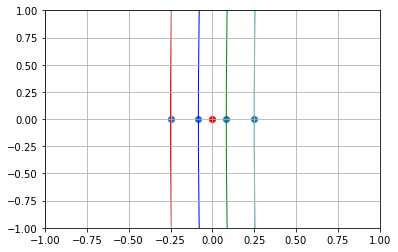

In [29]:
fig1 = plt.figure()
plt.scatter(antenna.coord[0],antenna.coord[1],c='r')
plt.scatter(antenna.positions[0],antenna.positions[1])
distances = antenna.component_to_signal(transmitter)
circles = fig1.add_subplot(1,1,1)
circles.add_patch(plt.Circle((transmitter.coord[0],transmitter.coord[1]),radius=distances[0],fill = False,color='r'))
circles.add_patch(plt.Circle((transmitter.coord[0],transmitter.coord[1]),radius=distances[1],fill = False,color='b'))
circles.add_patch(plt.Circle((transmitter.coord[0],transmitter.coord[1]),radius=distances[2],fill = False,color='g'))
circles.add_patch(plt.Circle((transmitter.coord[0],transmitter.coord[1]),radius=distances[3],fill = False,color='c'))
plt.axis([-1,1,-1,1])
plt.grid()
#plt.show()

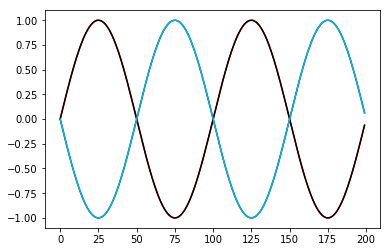

In [30]:
plt.plot(antenna.recieved_signal(transmitter,t,0),c = 'r')
plt.plot(antenna.recieved_signal(transmitter,t,1),c = 'b')
plt.plot(antenna.recieved_signal(transmitter,t,2), c = 'black')
plt.plot(antenna.recieved_signal(transmitter,t,3), c = 'c')

In [284]:
r = []
p_ang = []
p_sig = np.sum(carrier_wave**2)/len(t)
for j in arange(0,1000):
    p_ang.append(j);
    temp = 0;
    antenna = ULA(wave_length/2,[0,0],j,2)
    for i in arange(0,antenna.num_elements):
        #Sum all signals together
        temp = temp+antenna.recieved_signal(transmitter,t,i)
    #average power for wave over power of isotropic wave(0.5)
    temp = np.sum(temp**2)/(antenna.num_elements*len(t))*p_sig**-1
    r.append(temp)
p_ang = (np.array(p_ang)-90)/360*2*pi
r = 10*log10(np.array(r))#log scaled

r_normalized = []
for element in r:
    temp = 0
    if element<-40:
        temp = -40
    else:
        temp = element
    r_normalized.append(temp)

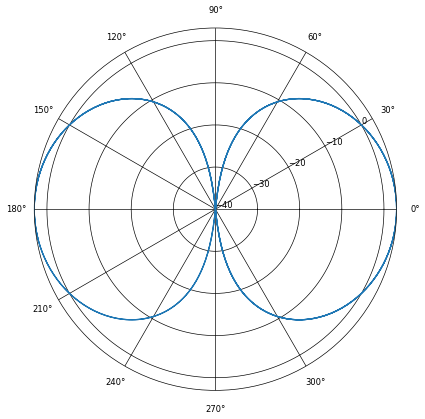

In [285]:
plt.figure(figsize=(8,8),dpi=60)
ax = plt.subplot(111,projection='polar')
ax.set_rlabel_position(30)
ax.plot(p_ang,r_normalized)

#Formatting Plot
ax.set_rticks([-40,-30,-20,-10,0])
ax.set_rmax(np.max(r_normalized))
ax.xaxis.grid(True,color='k')
ax.yaxis.grid(True,color = 'k')
ax.set_thetagrids(arange(0,330,30))
plt.savefig('power_ang_plot')
plt.show()

In [286]:
np.max(r_normalized)

3.0102999566398120671